In [ ]:
Correlation: Linear movement of two variables(It gives only direction of two variables)
Regression : It gives Causation of two variables 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Advertising Budget and Sales.csv')
df1 = pd.DataFrame(df, columns = ['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)','Sales ($)'])
df1

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df1['Advertising Spend ($)'] = df1['TV Ad Budget ($)'] + df1['Radio Ad Budget ($)'] + df1['Newspaper Ad Budget ($)']
df1

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($),Advertising Spend ($)
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [5]:
df2 = pd.DataFrame(df1, columns=['Advertising Spend ($)', 'Sales ($)'])
df2

,Advertising Spend ($),Sales ($)
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


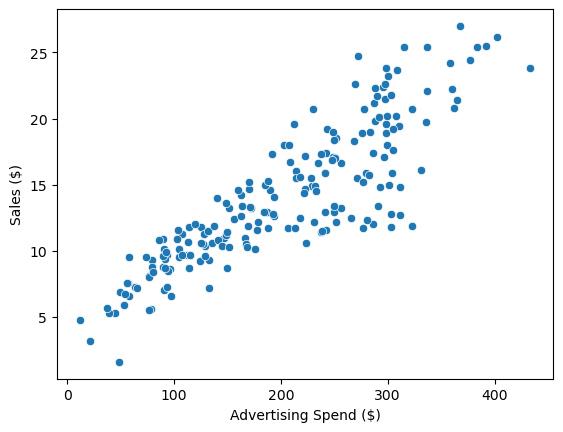

In [6]:
sns.scatterplot(df2, x = 'Advertising Spend ($)', y = 'Sales ($)')
plt.show()

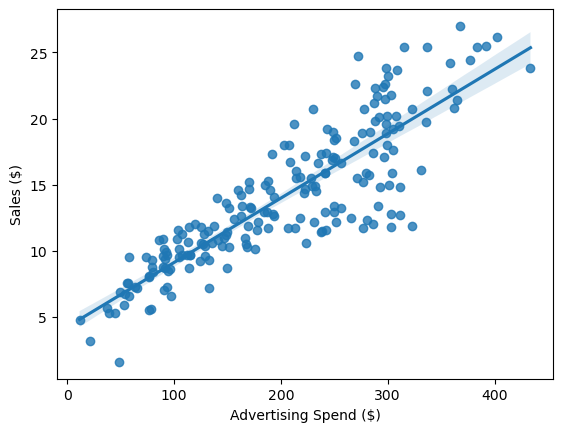

In [7]:
sns.regplot(df2, x = 'Advertising Spend ($)', y = 'Sales ($)')
plt.show()

In [8]:
x = df2['Advertising Spend ($)'] # defining predictor variable for the regression model
y = df2['Sales ($)'] # defining predicted variable for the regression model
np.polyfit(x,y, deg=1) # gives regression coefficients

array([0.04868788, 4.24302822])

In [9]:
potential_spend = np.linspace(0,500,100)

In [10]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

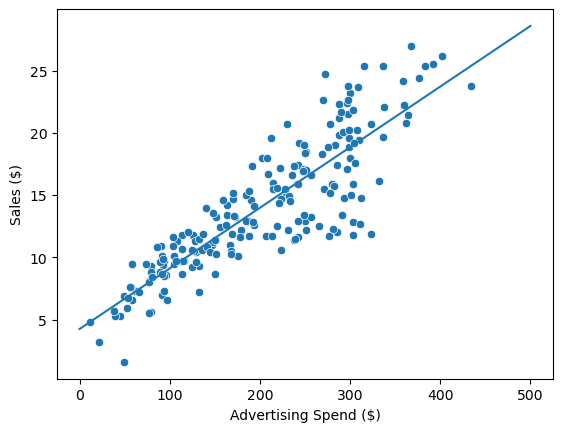

In [11]:
sns.scatterplot(df2, x ='Advertising Spend ($)',y ='Sales ($)')
plt.plot(potential_spend, predicted_sales)
plt.show()

In [13]:
x = df2.drop('Sales ($)', axis = 1)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
len(df2)

200

In [16]:
len(x_train), len(x_test), len(y_train), len(y_test)

(134, 66, 134, 66)

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
prediction = model.predict(x_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
test_1 = mean_absolute_error(y_test, prediction)
test_2 = mean_squared_error(y_test, prediction)
test_3 = r2_score(y_test, prediction)

In [22]:
test_1, test_2, test_3

(1.9323573630411937, 6.759105254397875, 0.7381101742365419)

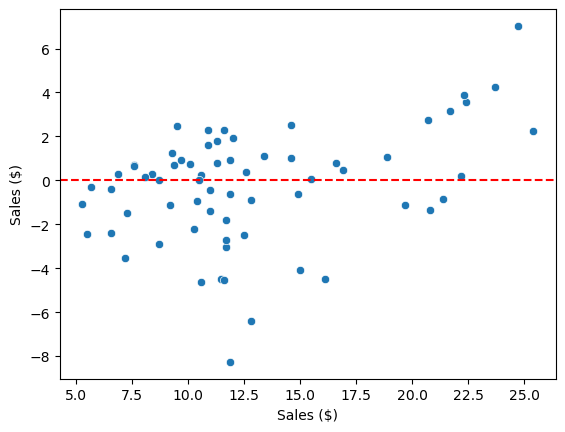

In [23]:
df_error =  y_test - prediction
sns.scatterplot(x=y_test, y=df_error)
plt.axhline(y=0, color='red', ls='--')
plt.show()

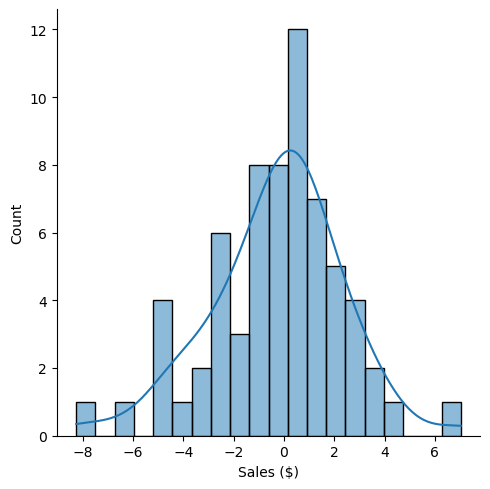

In [24]:
df_error.mean()
sns.displot(df_error, bins=20, kde=True)
plt.show()